<a href="https://colab.research.google.com/github/chinmayj23/DL/blob/main/Lecture_Assignment_2_J079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION**

In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = web.DataReader('ABFRL.NS', data_source='yahoo', start='2016-01-01', end='2021-2-25')

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,263.450012,232.000000,233.000000,248.000000,307528.0,248.000000
2016-01-04,258.799988,245.000000,249.449997,247.800003,198454.0,247.800003
2016-01-05,252.050003,242.699997,248.000000,245.300003,53406.0,245.300003
2016-01-06,246.899994,238.000000,246.899994,239.649994,43807.0,239.649994
2016-01-07,236.699997,226.300003,235.050003,228.949997,47286.0,228.949997
...,...,...,...,...,...,...
2021-02-22,168.399994,164.699997,164.800003,166.500000,1750989.0,166.500000
2021-02-23,169.899994,166.000000,168.149994,168.399994,4514222.0,168.399994
2021-02-24,184.000000,170.000000,170.000000,179.250000,7198216.0,179.250000


In [ ]:
data.iloc[data.shape[0]-39:,3]

Date
2021-01-04    3552.899902
2021-01-05    3551.100098
2021-01-06    3539.699951
2021-01-07    3552.800049
2021-01-08    3575.250000
2021-01-11    3612.850098
2021-01-12    3631.649902
2021-01-13    3621.149902
2021-01-14    3665.449951
2021-01-15    3609.050049
2021-01-18    3607.850098
2021-01-19    3601.250000
2021-01-20    3592.300049
2021-01-21    3630.800049
2021-01-22    3608.000000
2021-01-25    3613.550049
2021-01-27    3610.750000
2021-01-28    3603.750000
2021-01-29    3501.100098
2021-02-01    3520.750000
2021-02-02    3501.250000
2021-02-03    3516.500000
2021-02-04    3580.000000
2021-02-05    3541.649902
2021-02-08    3473.699951
2021-02-09    3462.399902
2021-02-10    3424.850098
2021-02-11    3462.750000
2021-02-12    3421.250000
2021-02-15    3417.000000
2021-02-16    3389.449951
2021-02-17    3364.000000
2021-02-18    3359.449951
2021-02-19    3331.199951
2021-02-22    3341.199951
2021-02-23    3335.949951
2021-02-24    3405.550049
2021-02-25    3405.000000
2021-02

In [4]:
data.shape

(1272, 6)

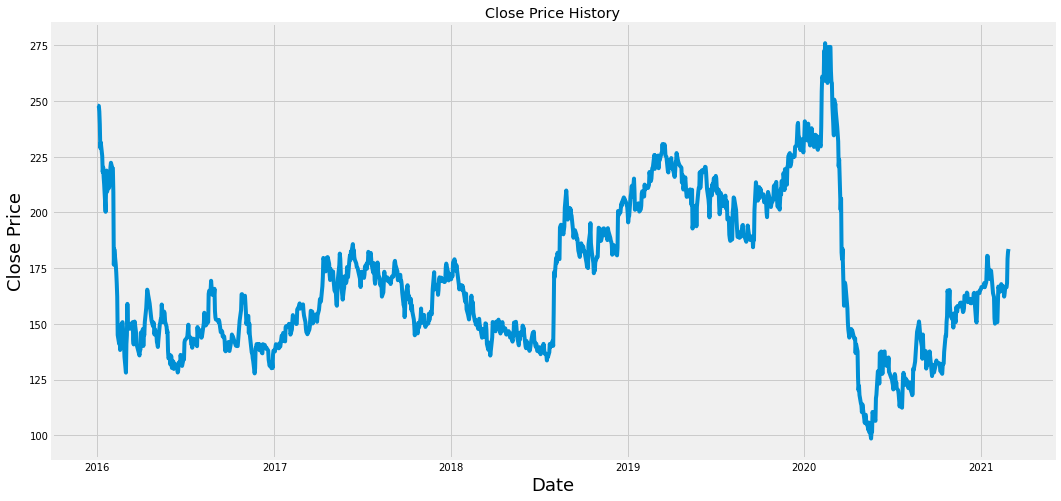

In [5]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [6]:
data = data.filter(['Close'])
dataset = data.values
training_data_len = data.shape[0]-39

training_data_len

1233

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [8]:
scaled_data

array([[0.84242798],
       [0.84130047],
       [0.82720638],
       ...,
       [0.45484045],
       [0.47231716],
       [0.47936421]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.84242798, 0.84130047, 0.82720638, 0.79535368, 0.73503098,
       0.74884318, 0.71473554, 0.67414449, 0.68598356, 0.6603323 ,
       0.64285567, 0.57351272, 0.63468103, 0.67780901, 0.62396956,
       0.6310166 , 0.63383542, 0.646802  , 0.68654736, 0.69754073,
       0.68316474, 0.68344664, 0.62312395, 0.43961885, 0.47880041,
       0.43933695, 0.41988712, 0.39310835, 0.35900063, 0.26175139,
       0.23948274, 0.2634427 , 0.22397924, 0.25977818, 0.28712076,
       0.2944497 , 0.27725489, 0.2631608 , 0.23891895, 0.20650253,
       0.16675718, 0.23920085, 0.26146949, 0.34067831, 0.29050337,
       0.27753679, 0.28148312, 0.28796637, 0.28965768, 0.2944497 ,
       0.25075802, 0.23807333, 0.27189916, 0.29585911, 0.26710713,
       0.23835523, 0.23356321, 0.21016705, 0.22313355, 0.22454295])]
[0.2682346401365572]

[array([0.84242798, 0.84130047, 0.82720638, 0.79535368, 0.73503098,
       0.74884318, 0.71473554, 0.67414449, 0.68598356, 0.6603323 ,
       0.64285567, 0.57351272, 0.634

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1173, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1173/1173 [==============================] - 29s 22ms/step - loss: 0.0060


In [16]:
test_data = scaled_data[training_data_len-60:,:]

x_test, y_test = [], dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [20]:
rmse = np.sqrt(np.mean(prediction- y_test)**2)

In [21]:
rmse

2.7657885429186697

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction 
valid['Error Precentage'] = ((valid['Close'] - valid['Prediction'])/valid['Close'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


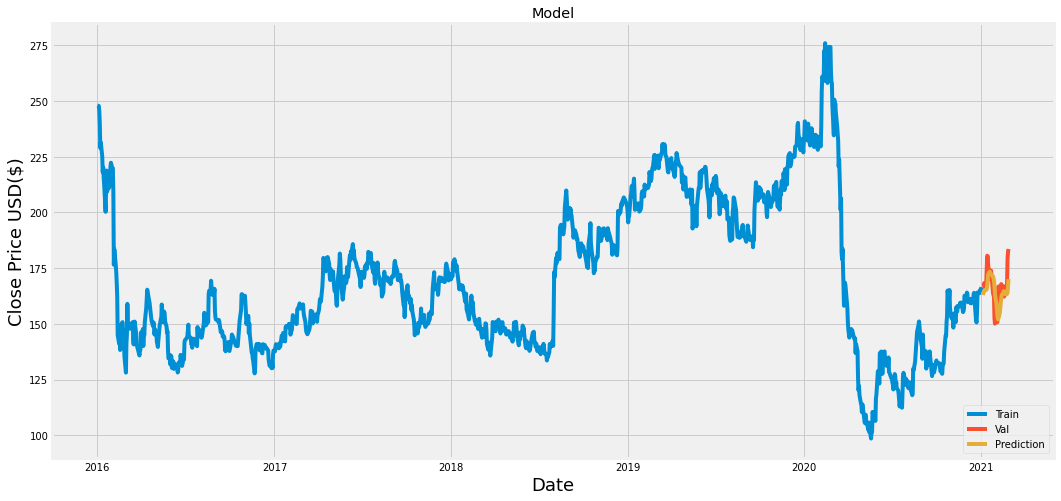

In [23]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'], loc='lower right')
plt.show()

In [24]:
valid

,Close,Prediction,Error Precentage
Date,,,
2021-01-04,166.800003,162.952728,2.306520
2021-01-05,166.949997,163.784485,1.896084
2021-01-06,166.699997,164.389877,1.385795
2021-01-07,168.350006,164.742661,2.142765
2021-01-08,166.449997,165.205750,0.747520
2021-01-11,168.750000,165.294281,2.047833
2021-01-12,174.550003,165.612305,5.120423
2021-01-13,180.550003,166.958435,7.527869
2021-01-14,180.399994,169.518143,6.032068
